In [50]:
import numpy as np
from matplotlib import pyplot as plt

In [51]:
stretchedGrid = True
stretchedName = '_stretchedGrid_' if stretchedGrid else '_evenGrid_'
numOfIt = 1000
filename = './output/parPlates' + stretchedName + 'iter' + str(numOfIt) + '.npz'

# Defining the domain, can be uneven
dx = 1000 # m
dy = 1000 # m
# dz = 1 # m

nx = 100
ny = 100
nz = 86 #100

x = dx*np.arange(0,nx)
y = dy*np.arange(0,ny)
# z = dz*np.arange(0,nz)

# Stretched grid to match Shelby's stretched grid
if stretchedGrid:
    z = np.array(
    [   50.0,  153.94739 ,   265.7895  ,   385.52637,    513.15796,
       648.68427,    792.10535,    943.42114,   1102.6316,    1269.7368,
      1444.7369,    1627.6317,    1818.4211,    2017.1055,    2223.6843,
      2438.1582,    2660.5264,    2890.7896,    3128.9475,    3375.,
      3625. ,       3875. ,       4125. ,       4375. ,       4625.,
      4875. ,       5125. ,       5375. ,       5625. ,       5875.,
      6125. ,       6375. ,       6625. ,       6875. ,       7125.,
      7375. ,       7625. ,       7875. ,       8125. ,       8375.,
      8625. ,       8875. ,       9125. ,       9375. ,       9625.,
      9875. ,      10125. ,      10375. ,      10625. ,      10875.,
     11125. ,      11375. ,      11625. ,      11875. ,      12125.,
     12375. ,      12625. ,      12875. ,      13125. ,      13375.,
     13625. ,      13875. ,      14125. ,      14375. ,      14625.,
     14875. ,      15125. ,      15375. ,      15625. ,      15875.,
     16125. ,      16375. ,      16625. ,      16875. ,      17125.,
     17375. ,      17625. ,      17875. ,      18125. ,      18375.,
     18625. ,      18875. ,      19125. ,      19375. ,      19625.,
     19875. ]
    )/10000.
else:
    z = np.arange(50,19625,(19625-50)/nz)/10000

In [52]:
def centers_to_edges_1d(x):
    # Assuming evenly spaced x values
    dx = x[1]-x[0]
    # Translate all points by a value of dx/2
    x = x-dx/2
    # Append a new point located dx units past the last data point
    return np.insert(x,-1,x[-1]+dx)

y_edge = centers_to_edges_1d(y)
z_edge = centers_to_edges_1d(z)

Y_edge,Z_edge = np.meshgrid(y_edge,z_edge)

print(Y_edge.shape, Z_edge.shape)

(87, 101) (87, 101)


In [53]:
data = np.load(filename)
lst = data.files

print(lst)

['phiInit', 'phi']


In [54]:
pb = data['phiInit']

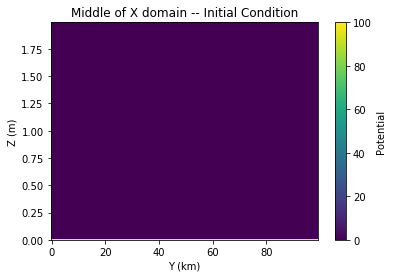

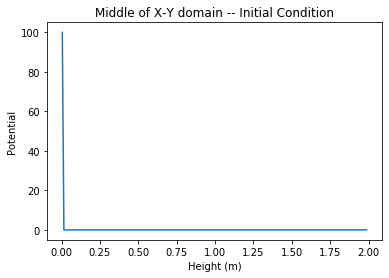

In [55]:
# plt.plot(pb[50,:,:])

if stretchedGrid:
    stretchedTitle = "Stretched Vertical Grid"
    stretchedName = "stretched.png"
else:
    stretchedTitle = "Uniform Vertical Grid"
    stretchedName = "uniform.png"

fig = plt.figure(figsize=(6,4))
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')
plt.title('Middle of X domain -- Initial Condition')
im = plt.pcolormesh(y_edge/1000, z_edge, np.transpose(pb[np.int(nx/2),:,:]))
cb = plt.colorbar(im)
cb.set_label('Potential')

plt.savefig(filename[:-4]+"_crossInit_"+stretchedName)

fig = plt.figure(figsize=(6,4))
plt.xlabel('Height (m)')
plt.ylabel('Potential')
plt.title('Middle of X-Y domain -- Initial Condition')
plt.plot(z,pb[np.int(nx/2),np.int(ny/2),:])

plt.savefig(filename[:-4]+"_centerInit_"+stretchedName)

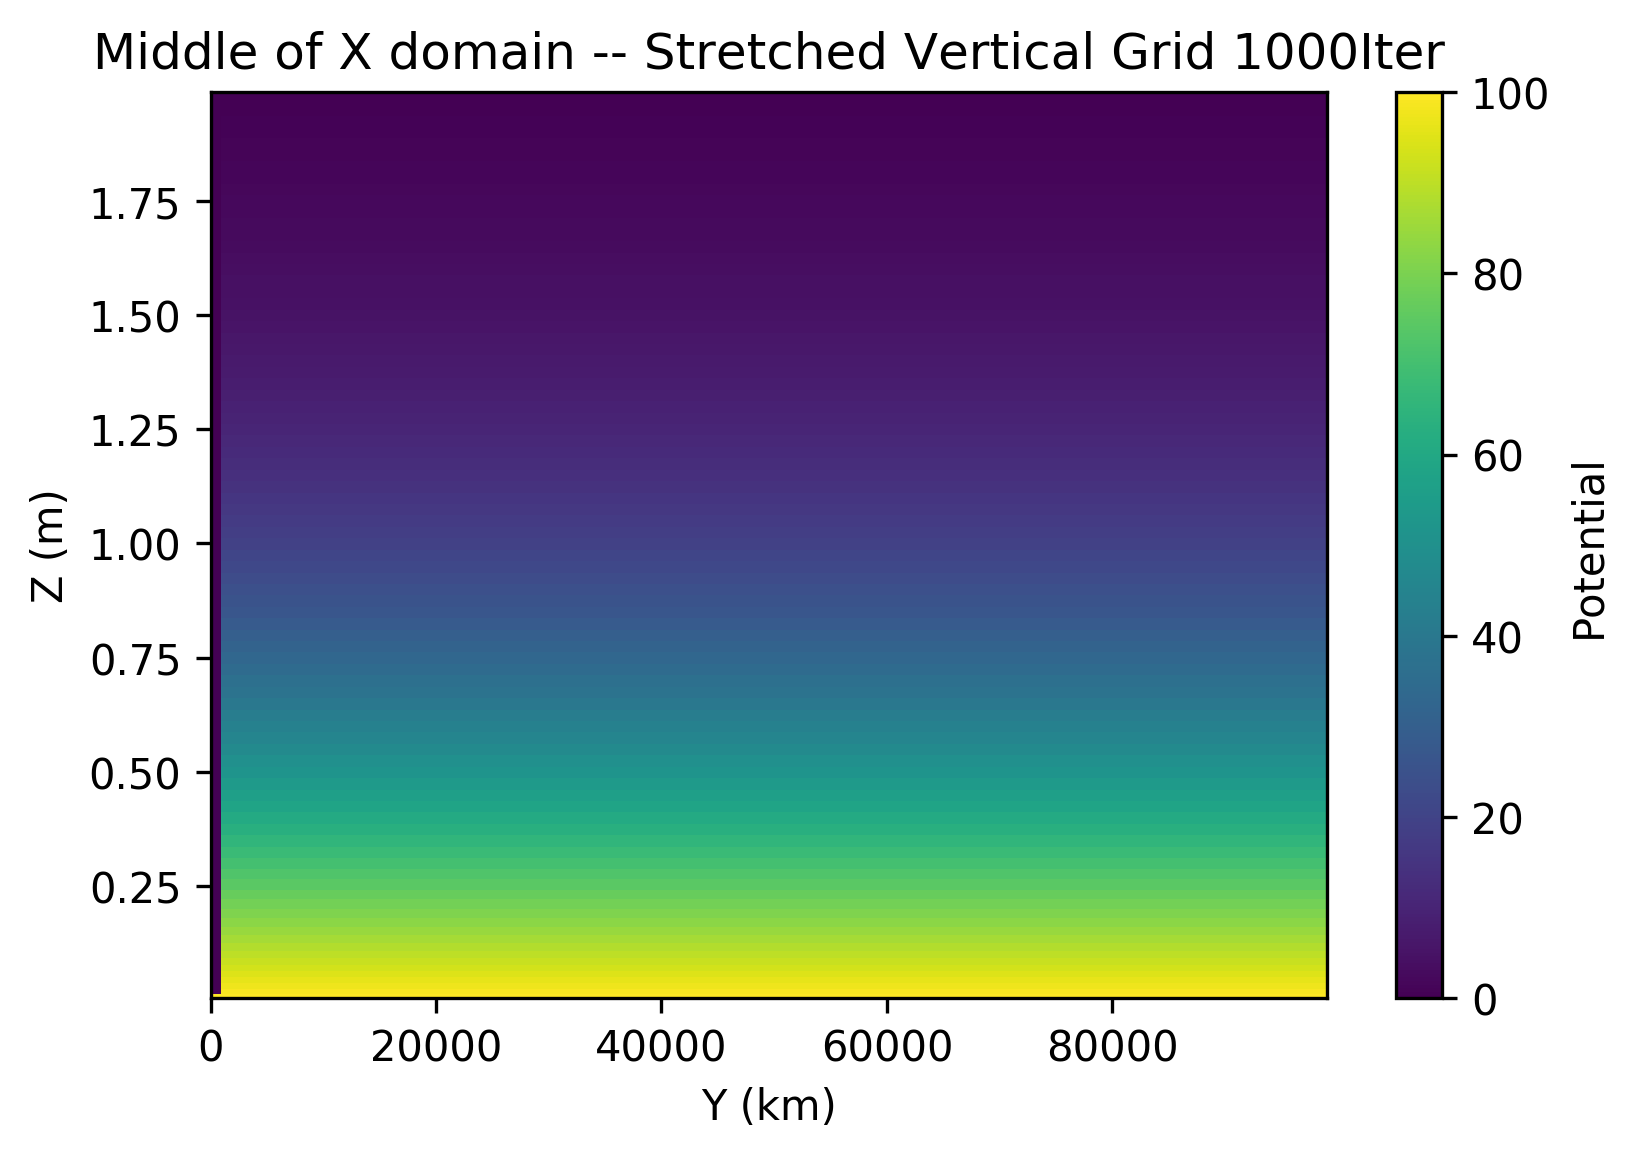

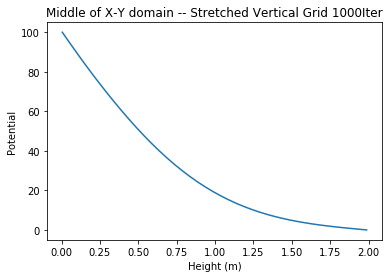

In [56]:
# plt.plot(pb[50,:,:])

pb = data['phi']

if stretchedGrid:
    stretchedTitle = "Stretched Vertical Grid"
    stretchedName = "stretched.png"
else:
    stretchedTitle = "Uniform Vertical Grid"
    stretchedName = "uniform.png"
    
fig = plt.figure(figsize=(6,4), dpi=300)
plt.xlabel('Y (km)')
plt.ylabel('Z (m)')
plt.title('Middle of X domain -- ' + stretchedTitle + " " + str(numOfIt) + "Iter")
im = plt.pcolormesh(y, z, np.transpose(pb[np.int(nx/2),:,:]))
cb = plt.colorbar(im)
cb.set_label('Potential')

plt.savefig(filename[:-4]+"_cross_"+stretchedName)

fig = plt.figure(figsize=(6,4))
plt.xlabel('Height (m)')
plt.ylabel('Potential')
plt.title('Middle of X-Y domain -- ' + stretchedTitle + " " + str(numOfIt) + "Iter")
plt.plot(z,pb[np.int(nx/2),np.int(ny/2),:])

plt.savefig(filename[:-4]+"_center_"+stretchedName)